# Analysis of traditional stock and bond portfolios: Conservative, Moderate, and Aggressive

## Performing analysis on traditional portfolios to set a benchmark to compare risk/return to portfolios that include digital assets

In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
import numpy as np
import alpaca_trade_api as tradeapi
import hvplot.pandas

In [2]:
from MCForecastTools import MCSimulation

In [3]:
# Load .env variables
from dotenv import load_dotenv
load_dotenv("alpaca_keys.env")

True

In [4]:
# Set alpaca key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Find risk and return on traditional portfolios
### Define assets and weights

In [5]:
# Define assets and weights for conservative portfolio 
conservative_tickers = ['BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights = [.4, .1, .2 ,.25, .05]

In [6]:
# Define assets and weights for moderate portfolio
moderate_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights = [.3, .25, .25, .05, .15]

In [7]:
# Define assets and weights for aggressive portfolio
aggressive_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights = [.1, .30, .30 ,.1, .2]

### Run Monte Carlo simulation on conservative portfolio

In [8]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
conservative_data = api.get_barset(
    conservative_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df



In [9]:
# Clean data
conservative_data = conservative_data.dropna()
conservative_data.head()

BIV                                     BSV  \
                            open   high      low  close    volume   open   
time                                                                       
2017-11-21 00:00:00-05:00  84.26  84.30  84.1300  84.21  440780.0  79.39   
2017-11-22 00:00:00-05:00  84.28  84.48  84.2300  84.42  459607.0  79.41   
2017-11-24 00:00:00-05:00  84.37  84.43  84.3500  84.38  223736.0  79.43   
2017-11-27 00:00:00-05:00  84.41  84.48  84.3100  84.43  424371.0  79.44   
2017-11-28 00:00:00-05:00  84.53  84.58  84.4316  84.49  430305.0  79.48   

                                                              ...      VV  \
                            high      low   close     volume  ...    open   
time                                                          ...           
2017-11-21 00:00:00-05:00  79.40  79.3300  79.360   887800.0  ...  119.05   
2017-11-22 00:00:00-05:00  79.48  79.3900  79.470   932371.0  ...  119.50   
2017-11-24 00:00:00-05:00  79.46  79.4222  79.445   395388.0  ...  119.65   
2017-11-27 00:00:00-05:00  79.48  79.4000  79.465   789211.0  ...  119.70   
2017-11-28 00:00:00-05:00  79.50  79.4500  79.460  1252836.0  ...  119.81   

                                                                VXUS         \
                               high     low   close    volume   open   high   
time                                                                          
2017-11-21 00:00:00-05:00  119.5200  119.05  119.42  121311.0  56.10  56.30   
2017-11-22 00:00:00-05:00  119.5800  119.28  119.36  111051.0  56.51  56.53   
2017-11-24 00:00:00-05:00  119.6900  119.52  119.61   71618.0  56.71  56.75   
2017-11-27 00:00:00-05:00  119.8099  119.44  119.63  122179.0  56.59  56.59   
2017-11-28 00:00:00-05:00  120.7600  119.75  120.71  158471.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [10]:
# Define monte carlo simulation
MC_conservative = MCSimulation(
    portfolio_data = conservative_data,
    weights = cons_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [11]:
# Run monte carlo simulation
MC_conservative.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999846  1.001692  0.994556  0.998616  0.998627  0.998513  0.998804   
2     0.997060  0.995029  0.993669  0.995989  0.995102  1.002975  0.989300   
3     1.002314  0.992835  0.989139  0.998941  0.995103  1.014554  0.986898   
4     0.998368  0.990409  0.991040  0.996156  0.986152  1.013557  0.986384   
...        ...       ...       ...       ...       ...       ...       ...   
5036  3.573531  6.490503  4.828445  3.986326  5.603911  5.217102  3.793121   
5037  3.572393  6.489956  4.858960  3.986175  5.606580  5.225023  3.818886   
5038  3.575976  6.505468  4.841564  4.005962  5.612877  5.236975  3.836691   
5039  3.557272  6.481703  4.849068  4.037802  5.617402  5.281304  3.837755   
5040  3.569690  6.505153  4.835171  4.039150  5.644040  5.257675  3.839176   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998715  1.000480  1.005877  ...  1.000530  0.996834  1.008139   
2     1.001270  0.999552  1.007690  ...  1.004853  0.998312  1.002848   
3     1.007372  1.001007  1.011725  ...  1.008672  1.004664  1.005850   
4     1.004833  1.001053  1.012090  ...  1.011458  1.006637  1.002440   
...        ...       ...       ...  ...       ...       ...       ...   
5036  3.958748  5.753985  4.361887  ...  4.213411  4.032941  6.758740   
5037  3.981426  5.759808  4.422322  ...  4.195242  4.060384  6.767506   
5038  4.017195  5.772856  4.423390  ...  4.197203  4.047349  6.765276   
5039  3.986226  5.747633  4.416066  ...  4.202244  4.065200  6.745611   
5040  4.005042  5.739045  4.439849  ...  4.163479  4.056534  6.733810   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.996834  0.995956  0.999428  1.004696  0.994971  1.003389  1.002209  
2     1.005524  0.996097  0.993796  0.996205  0.991569  1.002957  1.003376  
3     1.005549  0.999825  0.993046  0.997156  0.989148  1.000202  1.006479  
4     1.012053  1.007540  0.996310  0.996241  0.991704  0.998600  1.000755  
...        ...       ...       ...       ...       ...       ...       ...  
5036  3.689400  4.421423  5.487786  3.741802  6.097813  6.341161  4.815212  
5037  3.697567  4.448491  5.466125  3.734502  6.110774  6.355602  4.804005  
5038  3.703138  4.436532  5.454062  3.753805  6.125176  6.366272  4.800316  
5039  3.734651  4.427306  5.437490  3.760406  6.123531  6.363564  4.823828  
5040  3.727203  4.420275  5.440389  3.742929  6.127508  6.334565  4.850640  

[5041 rows x 500 columns]

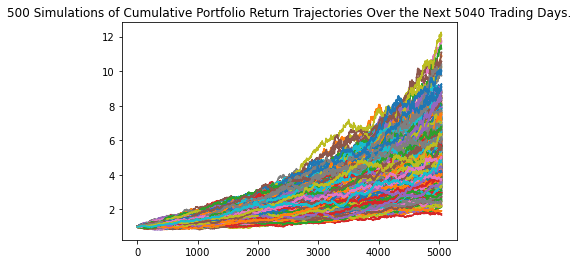

In [139]:
# Line plot for conservative monte carlo sim
line_plot_cons = MC_conservative.plot_simulation()

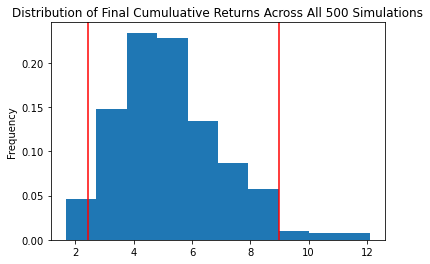

In [13]:
# Distribution plot for conservative monte carlo sim
dist_plot_cons = MC_conservative.plot_distribution()

In [14]:
# Summary statistics
tbl_conservative = MC_conservative.summarize_cumulative_return()
print(tbl_conservative)

count           500.000000
mean              5.265334
std               1.776081
min               1.673944
25%               4.004388
50%               4.981056
75%               6.332007
max              12.106915
95% CI Lower      2.445874
95% CI Upper      8.995883
Name: 5040, dtype: float64


### Run monte carlo simulation on moderate portfolio

In [15]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
moderate_data = api.get_barset(
    moderate_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [16]:
# Clean data
moderate_data = moderate_data.dropna()
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [17]:
# Define monte carlo sim for moderate portfolio
MC_mod = MCSimulation(
    portfolio_data = moderate_data,
    weights = mod_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [18]:
# Run monte carlo sim 
MC_mod.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4         5         6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1     1.009973  1.000691  0.993721  0.997858   1.000530  1.001981  0.996017   
2     1.012652  0.999360  0.997613  0.991288   0.995929  1.007612  1.004514   
3     1.009790  0.998385  0.997850  1.004413   1.002283  1.008360  1.003755   
4     1.014003  0.986510  1.002107  1.004540   1.009416  1.008217  1.011909   
...        ...       ...       ...       ...        ...       ...       ...   
5036  5.744086  6.588513  4.891291  9.679694  12.852451  8.352097  5.941618   
5037  5.748124  6.601366  4.883888  9.591611  12.763627  8.348867  5.913433   
5038  5.746092  6.635957  4.881585  9.598955  12.842552  8.258163  5.872508   
5039  5.742561  6.590722  4.845837  9.646911  12.853238  8.200864  5.896059   
5040  5.748229  6.583082  4.788256  9.585226  12.904727  8.263271  5.853537   

            7         8         9    ...       490       491       492  \
0      1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1      0.999613  0.999366  1.008566  ...  0.994389  1.006826  0.998457   
2      0.996229  1.005011  1.018144  ...  0.997690  1.003535  0.999679   
3      0.996516  1.006287  1.017884  ...  1.005634  1.004386  0.996532   
4      0.992806  1.010504  0.997463  ...  1.008800  1.003791  0.999091   
...         ...       ...       ...  ...       ...       ...       ...   
5036  10.056164  2.236933  5.709047  ...  8.406523  5.346159  4.108362   
5037  10.071808  2.217721  5.711960  ...  8.441412  5.388345  4.052350   
5038  10.106120  2.234562  5.747277  ...  8.480945  5.432680  4.042996   
5039  10.169690  2.238981  5.790927  ...  8.522356  5.450915  4.057740   
5040  10.219665  2.234100  5.845785  ...  8.550359  5.449466  4.113598   

           493       494        495       496       497       498        499  
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   1.000000  
1     0.997490  1.002915   0.993762  1.010661  1.004522  1.001592   1.000469  
2     1.000913  1.010770   0.992967  1.012709  0.996702  1.003511   1.007280  
3     1.004925  1.013581   0.991983  1.025859  0.993560  1.007811   1.007199  
4     1.003070  1.010280   0.994075  1.028151  0.991523  1.011380   1.008404  
...        ...       ...        ...       ...       ...       ...        ...  
5036  4.450468  7.532121  10.018185  6.060978  9.236627  7.322660  11.726347  
5037  4.476693  7.558683   9.985886  6.005810  9.326241  7.319231  11.778317  
5038  4.500689  7.574126  10.001701  6.031514  9.253170  7.370297  11.754815  
5039  4.472801  7.505739   9.986954  5.987785  9.229083  7.363537  11.630226  
5040  4.491046  7.573531   9.940317  5.975964  9.119856  7.310463  11.596633  

[5041 rows x 500 columns]

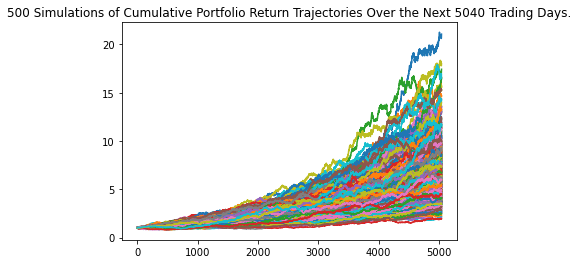

In [19]:
# Line plot for moderate monte carlo sim
line_plot_mod = MC_mod.plot_simulation()

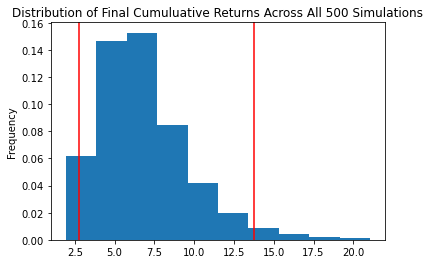

In [20]:
# Distribution plot
dist_plot_mod = MC_mod.plot_distribution()

In [21]:
# Summary statistics
tbl_moderate = MC_mod.summarize_cumulative_return()
print(tbl_moderate)

count           500.000000
mean              6.826183
std               2.847432
min               1.927821
25%               4.673002
50%               6.444971
75%               8.344156
max              21.059199
95% CI Lower      2.764667
95% CI Upper     13.774420
Name: 5040, dtype: float64


### Run monte carlo simulation on aggressive portfolio 

In [22]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
aggressive_data = api.get_barset(
    aggressive_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


In [23]:
# Clean data
aggressive_data = aggressive_data.dropna()
aggressive_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [24]:
# Define Monte carlo sim for aggressive portfolio
MC_agg = MCSimulation(
    portfolio_data = aggressive_data,
    weights = agg_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [25]:
# Run monte carlo
MC_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3         4         5         6    \
0      1.000000   1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1      1.003340   0.997264  1.010516   0.998724  1.001649  1.009188  1.006097   
2      1.012311   0.994466  1.020266   0.997957  0.993195  1.004668  1.001798   
3      1.011968   1.006573  1.018323   1.004475  0.990343  1.004263  0.993544   
4      1.019075   0.998035  1.014417   1.008852  0.988309  1.009200  0.997304   
...         ...        ...       ...        ...       ...       ...       ...   
5036  10.766393  28.114947  5.028622  13.157476  7.250185  8.281481  6.104776   
5037  10.873140  28.226702  5.094325  13.317372  7.226926  8.334143  6.097069   
5038  10.927760  28.374276  5.100210  13.190485  7.195735  8.230147  6.128943   
5039  10.902919  28.334058  5.160057  13.098698  7.257600  8.177856  6.144280   
5040  10.860148  27.912033  5.188756  13.039893  7.279673  8.274402  6.136946   

           7         8         9    ...       490        491        492  \
0     1.000000  1.000000  1.000000  ...  1.000000   1.000000   1.000000   
1     0.996562  1.002099  0.990182  ...  1.003019   0.997456   1.014019   
2     0.987351  1.003744  0.981537  ...  1.000634   0.990882   1.018330   
3     0.983954  1.007433  0.975028  ...  1.006128   0.992918   1.020569   
4     0.981348  1.012298  0.970415  ...  1.003349   0.983609   1.023894   
...        ...       ...       ...  ...       ...        ...        ...   
5036  7.098678  4.156478  9.897410  ...  3.514569  11.774113  15.927195   
5037  7.171750  4.146346  9.848683  ...  3.499561  11.772821  16.005731   
5038  7.217235  4.140740  9.933686  ...  3.482174  11.841492  16.022009   
5039  7.189492  4.109722  9.983221  ...  3.514218  12.023540  16.080287   
5040  7.161900  4.094519  9.974685  ...  3.549167  12.003002  16.140035   

           493        494       495       496       497        498       499  
0     1.000000   1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  
1     1.000546   0.986805  0.996713  1.004543  1.011957   1.007690  0.993228  
2     1.006895   0.992937  0.993860  1.005453  1.008140   1.007633  0.991650  
3     1.006976   0.987475  1.007811  0.993360  0.995489   1.004016  0.978082  
4     1.023236   1.002035  1.007841  0.988407  0.991550   1.016793  0.975990  
...        ...        ...       ...       ...       ...        ...       ...  
5036  7.433142  11.613020  9.776579  4.668071  3.721248  15.323482  4.693731  
5037  7.295445  11.626219  9.823189  4.657289  3.742583  15.383781  4.732598  
5038  7.285961  11.619104  9.808844  4.590787  3.772909  15.486851  4.822989  
5039  7.331947  11.530012  9.761799  4.573740  3.718684  15.476557  4.828842  
5040  7.364265  11.468695  9.719902  4.556588  3.726497  15.581176  4.828386  

[5041 rows x 500 columns]

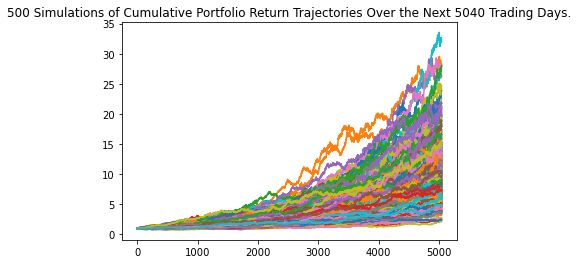

In [26]:
# Line plot for aggressive portfolio
line_plot_agg = MC_agg.plot_simulation()

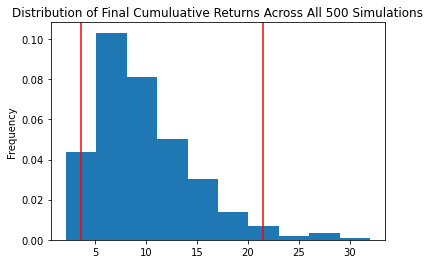

In [27]:
# Distribution plot
dist_plot_agg = MC_agg.plot_distribution()

In [28]:
# Summary Statistics
tbl_agg = MC_agg.summarize_cumulative_return()
print(tbl_agg)

count           500.000000
mean              9.851782
std               4.797109
min               2.122553
25%               6.641225
50%               8.853880
75%              12.348743
max              31.979286
95% CI Lower      3.619268
95% CI Upper     21.474539
Name: 5040, dtype: float64


### Find cumulative returns for Conservative portfolio since Jan 1, 2015

In [29]:
# Define weights and assets
conservative_tickers = ['BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights = [.4, .1, .2 ,.25, .05]

In [30]:
# Delete extraneous columns 
cons_returns = conservative_data.drop([(
    'BIV', 'open'),
    ('BIV', 'high'),
    ('BIV', 'low'),
    ('BIV', 'volume'),
    ('BSV', 'open'),
    ('BSV', 'high'),
    ('BSV', 'low'),
    ('BSV', 'volume'),
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume'),
    ('VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),    
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume')
], axis = 1, inplace = True)

In [31]:
# Delete extraneous columns
cons_returns = conservative_data.rename(columns = {'BIV':'', 'BSV':'', 'VB':'', 'VV':'', 'VXUS':''})
cons_returns.head()

close   close   close   close  close
time                                                           
2017-11-21 00:00:00-05:00  84.21  79.360  145.50  119.42  56.23
2017-11-22 00:00:00-05:00  84.42  79.470  145.42  119.36  56.40
2017-11-24 00:00:00-05:00  84.38  79.445  145.58  119.61  56.69
2017-11-27 00:00:00-05:00  84.43  79.465  145.07  119.63  56.28
2017-11-28 00:00:00-05:00  84.49  79.460  146.87  120.71  56.60

In [32]:
# Rename columns
cons_returns.columns = ['BIV', 'BSV', 'VB', 'VV', 'VZUS']

In [33]:
# Find percentage change
cons_returns = cons_returns.pct_change()
cons_returns.head()

BIV       BSV        VB        VV      VZUS
time                                                                       
2017-11-21 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN
2017-11-22 00:00:00-05:00  0.002494  0.001386 -0.000550 -0.000502  0.003023
2017-11-24 00:00:00-05:00 -0.000474 -0.000315  0.001100  0.002095  0.005142
2017-11-27 00:00:00-05:00  0.000593  0.000252 -0.003503  0.000167 -0.007232
2017-11-28 00:00:00-05:00  0.000711 -0.000063  0.012408  0.009028  0.005686

In [34]:
# Calculate cummulative return
conservative_returns_combined = cons_returns.dot(cons_weights)

In [35]:
# Find overal portfolio returns
conservative_returns_combined

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001052
2017-11-24 00:00:00-05:00    0.000780
2017-11-27 00:00:00-05:00   -0.000758
2017-11-28 00:00:00-05:00    0.005301
                               ...   
2021-11-04 00:00:00-04:00    0.002031
2021-11-05 00:00:00-04:00    0.004749
2021-11-08 00:00:00-05:00   -0.000513
2021-11-09 00:00:00-05:00   -0.000101
2021-11-10 00:00:00-05:00   -0.008831
Length: 999, dtype: float64

<AxesSubplot:title={'center':'Conservative portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

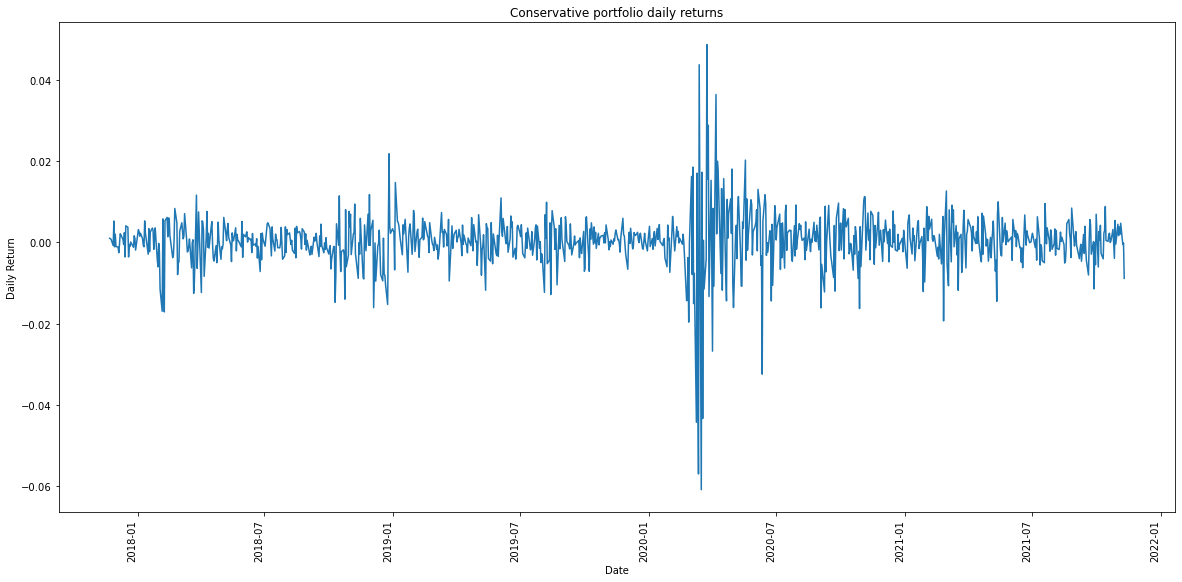

In [36]:
# Plot conservative returns
conservative_returns_combined.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Conservative portfolio daily returns")

In [37]:
# Find cumulative returns for conservative portfolio and plot
conservative_cumulative_returns = (1 + conservative_returns_combined).cumprod() - 1
conservative_cumulative_returns_plot = conservative_cumulative_returns.hvplot(title = "Conservative Portfolio Returns", xlabel = "Date", ylabel = "% Return")
conservative_cumulative_returns_plot

:Curve   [time]   (0)

In [38]:
conservative_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001052
2017-11-24 00:00:00-05:00    0.001832
2017-11-27 00:00:00-05:00    0.001073
2017-11-28 00:00:00-05:00    0.006379
                               ...   
2021-11-04 00:00:00-04:00    0.362193
2021-11-05 00:00:00-04:00    0.368662
2021-11-08 00:00:00-05:00    0.367960
2021-11-09 00:00:00-05:00    0.367822
2021-11-10 00:00:00-05:00    0.355743
Length: 999, dtype: float64

### Find cumulative returns for moderate portfolio since Jan 1, 2015

In [39]:
# Define assets and weights
moderate_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights = [.3, .25, .25, .05, .15]
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [40]:
# Drop extraneous columns
moderate_returns = moderate_data.drop([(
    'VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume'),
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume'),
    ('VWO', 'open'),
    ('VWO', 'high'),
    ('VWO', 'low'),
    ('VWO', 'volume'),    
    ('BND', 'open'),
    ('BND', 'high'),
    ('BND', 'low'),
    ('BND', 'volume')
], axis = 1, inplace = True)

In [41]:
# Drop extraneous columns
moderate_returns = moderate_data.rename(columns = {'VV':'', 'VB':'', 'VXUS':'', 'VWO':'', 'BND':''})

In [42]:
# Rename columns
moderate_returns.columns = ['VV', 'VB', 'VXUS', 'VWO', 'BND']
moderate_returns.head()

VV      VB    VXUS    VWO    BND
time                                                          
2017-11-21 00:00:00-05:00  81.69  145.50  119.42  45.63  56.23
2017-11-22 00:00:00-05:00  81.88  145.42  119.36  45.75  56.40
2017-11-24 00:00:00-05:00  81.83  145.58  119.61  45.59  56.69
2017-11-27 00:00:00-05:00  81.82  145.07  119.63  45.11  56.28
2017-11-28 00:00:00-05:00  81.84  146.87  120.71  45.40  56.60

In [43]:
# Find percentage change of moderate portfolio
moderate_returns = moderate_returns.pct_change()

In [44]:
# Find total portfolio returns and plot
moderate_returns_combined = moderate_returns.dot(mod_weights)

<AxesSubplot:title={'center':'Moderate Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

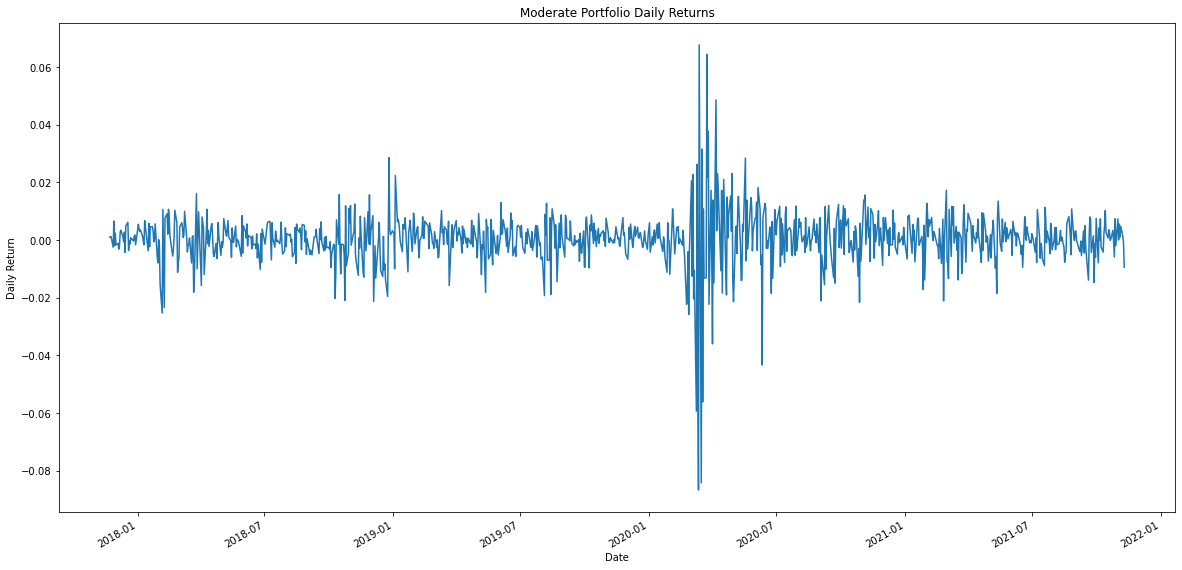

In [45]:
moderate_returns_combined.plot(title = "Moderate Portfolio Daily Returns", figsize = [20,10], xlabel = "Date", ylabel = "Daily Return")

In [46]:
# Find cumulative returns of moderate portfolio 
moderate_cumulative_returns = (1 + moderate_returns_combined).cumprod() - 1
moderate_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001020
2017-11-24 00:00:00-05:00    0.002233
2017-11-27 00:00:00-05:00   -0.000255
2017-11-28 00:00:00-05:00    0.006350
                               ...   
2021-11-04 00:00:00-04:00    0.404546
2021-11-05 00:00:00-04:00    0.411303
2021-11-08 00:00:00-05:00    0.413145
2021-11-09 00:00:00-05:00    0.411852
2021-11-10 00:00:00-05:00    0.398530
Length: 998, dtype: float64

In [47]:
moderate_cumulative_returns_plot = moderate_cumulative_returns.hvplot(title = "Moderate Portfolio Returns", xlabel = "Date", ylabel = "% Return")
moderate_cumulative_returns_plot

:Curve   [time]   (0)

In [48]:
# Define assets and weights
aggressive_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights = [.1, .30, .30 ,.1, .2]
aggressive_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [49]:
# Drop extraneous columns
aggressive_returns = aggressive_data.drop([(
    'BND', 'open'),
    ('BND', 'high'),
    ('BND', 'low'),
    ('BND', 'volume'),
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume'),
    ('VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),
    ('VWO', 'open'),
    ('VWO', 'high'),
    ('VWO', 'low'),
    ('VWO', 'volume'),    
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume')
], axis = 1, inplace = True)


In [50]:
# Drop extraneous columns
aggressive_returns = aggressive_data.rename(columns = {'VV':'', 'VB':'', 'VXUS':'', 'VWO':'', 'BND':''})

In [51]:
# Rename columns
aggressive_returns.columns = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
aggressive_returns.head()

BND      VB      VV    VWO   VXUS
time                                                          
2017-11-21 00:00:00-05:00  81.69  145.50  119.42  45.63  56.23
2017-11-22 00:00:00-05:00  81.88  145.42  119.36  45.75  56.40
2017-11-24 00:00:00-05:00  81.83  145.58  119.61  45.59  56.69
2017-11-27 00:00:00-05:00  81.82  145.07  119.63  45.11  56.28
2017-11-28 00:00:00-05:00  81.84  146.87  120.71  45.40  56.60

In [52]:
# Find returns of aggressive portfolio
aggressive_returns = aggressive_returns.pct_change()

In [53]:
# Find returns for total portfolio and plot
aggressive_returns_combined = aggressive_returns.dot(agg_weights)

In [54]:
aggressive_returns_combined.head()

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.000785
2017-11-24 00:00:00-05:00    0.001576
2017-11-27 00:00:00-05:00   -0.003512
2017-11-28 00:00:00-05:00    0.008235
dtype: float64

<AxesSubplot:title={'center':'Aggressive Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

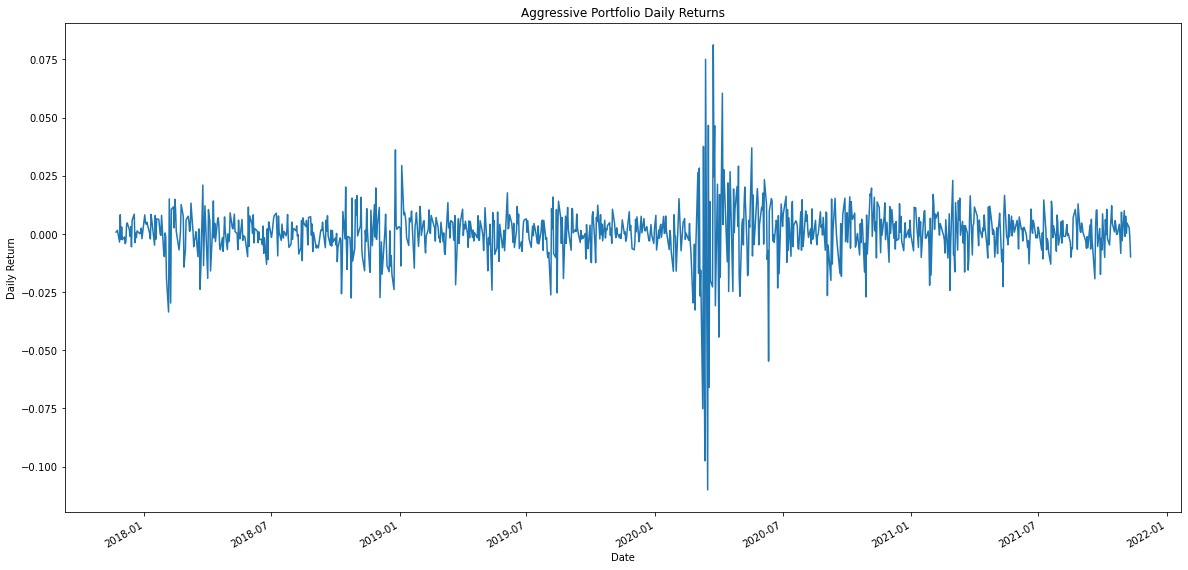

In [55]:
aggressive_returns_combined.plot(title = "Aggressive Portfolio Daily Returns", figsize = [20,10], xlabel = "Date", ylabel = "Daily Return")

In [56]:
# Find cumulative returns of aggressive portfolio and plot
aggressive_cumulative_returns = (1 + aggressive_returns_combined).cumprod() - 1
aggressive_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.000785
2017-11-24 00:00:00-05:00    0.002362
2017-11-27 00:00:00-05:00   -0.001159
2017-11-28 00:00:00-05:00    0.007067
                               ...   
2021-11-04 00:00:00-04:00    0.476878
2021-11-05 00:00:00-04:00    0.483819
2021-11-08 00:00:00-05:00    0.487715
2021-11-09 00:00:00-05:00    0.484718
2021-11-10 00:00:00-05:00    0.470085
Length: 998, dtype: float64

In [57]:
aggressive_returns_combined_plot = aggressive_cumulative_returns.hvplot(title = "Aggressive Portfolio Returns", xlabel = "Date", ylabel = "% Return")
aggressive_returns_combined_plot

:Curve   [time]   (0)

In [58]:
all_crypto_portfolios_plot = conservative_cumulative_returns.hvplot() * moderate_cumulative_returns.hvplot() * aggressive_cumulative_returns.hvplot()
all_crypto_portfolios_plot

:Overlay
   .Curve.A_0.I   :Curve   [time]   (0)
   .Curve.A_0.II  :Curve   [time]   (0)
   .Curve.A_0.III :Curve   [time]   (0)

## Portfolio Beta. Find and plot Beta and Sharpe Ratios for all portfolios

In [59]:
# Call conservative portfolio csv
cons_csv = Path("conservative_portfolio.csv")
conservative_csv = pd.read_csv(cons_csv, index_col="Date")
conservative_csv

BIV    BSV      VB      VV   VXUS
Date                                                
1/2/2015 16:00   84.87  79.95  116.28   94.31  48.21
1/5/2015 16:00   85.19  80.02  114.49   92.69  47.15
1/6/2015 16:00   85.57  80.09  113.03   91.79  46.79
1/7/2015 16:00   85.60  80.16  114.39   92.83  47.34
1/8/2015 16:00   85.44  80.17  116.21   94.58  47.94
...                ...    ...     ...     ...    ...
11/3/2021 16:00  88.77  81.47  237.49  217.62  65.81
11/4/2021 16:00  89.07  81.57  236.45  218.55  65.74
11/5/2021 16:00  89.49  81.66  238.81  219.18  65.88
11/8/2021 16:00  89.16  81.52  239.37  219.63  66.09
11/9/2021 16:00  89.41  81.58  238.74  218.94  65.89

[1727 rows x 5 columns]

In [60]:
# Call SP500 closing data csv
sp500_csv = Path('sp500.csv')
sp500_data = pd.read_csv(sp500_csv, index_col = "Date")
sp500_change= sp500_data.pct_change()
sp500_change

Close
Date                     
1/2/2015 16:00        NaN
1/5/2015 16:00  -0.018278
1/6/2015 16:00  -0.008893
1/7/2015 16:00   0.011630
1/8/2015 16:00   0.017888
...                   ...
11/3/2021 16:00  0.006461
11/4/2021 16:00  0.004182
11/5/2021 16:00  0.003733
11/8/2021 16:00  0.000888
11/9/2021 16:00 -0.003499

[1727 rows x 1 columns]

In [61]:
# Find the daily percent change of the conservative portfolio
conservative_change= conservative_csv.pct_change()
conservative_change

BIV       BSV        VB        VV      VXUS
Date                                                             
1/2/2015 16:00        NaN       NaN       NaN       NaN       NaN
1/5/2015 16:00   0.003770  0.000876 -0.015394 -0.017177 -0.021987
1/6/2015 16:00   0.004461  0.000875 -0.012752 -0.009710 -0.007635
1/7/2015 16:00   0.000351  0.000874  0.012032  0.011330  0.011755
1/8/2015 16:00  -0.001869  0.000125  0.015910  0.018852  0.012674
...                   ...       ...       ...       ...       ...
11/3/2021 16:00 -0.001350 -0.000123  0.013053  0.006615  0.006577
11/4/2021 16:00  0.003380  0.001227 -0.004379  0.004274 -0.001064
11/5/2021 16:00  0.004715  0.001103  0.009981  0.002883  0.002130
11/8/2021 16:00 -0.003688 -0.001714  0.002345  0.002053  0.003188
11/9/2021 16:00  0.002804  0.000736 -0.002632 -0.003142 -0.003026

[1727 rows x 5 columns]

In [62]:
# Find total conservative portfolio returns
cons_weights = [.4, .1, .2 ,.25, .05]
conservative_returns_combined = conservative_change.dot(cons_weights)
conservative_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.006877
1/6/2015 16:00    -0.003488
1/7/2015 16:00     0.006054
1/8/2015 16:00     0.007794
                     ...   
11/3/2021 16:00    0.004041
11/4/2021 16:00    0.001614
11/5/2021 16:00    0.004820
11/8/2021 16:00   -0.000505
11/9/2021 16:00   -0.000268
Length: 1727, dtype: float64

In [63]:
# Find conservative covariance
conservative_covariance = conservative_returns_combined.cov(sp500_change['Close'])
conservative_covariance

6.280118315813372e-05

In [64]:
mod_csv = Path("moderate_portfolio.csv")
moderate_csv = pd.read_csv(mod_csv, index_col="Date")

In [65]:
moderate_change= moderate_csv.pct_change()

In [66]:
# Find total moderate portfolio returns
mod_weights = [.3, .25, .25, .05, .15]
moderate_returns_combined = moderate_change.dot(mod_weights)
moderate_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.011366
1/6/2015 16:00    -0.006136
1/7/2015 16:00     0.008933
1/8/2015 16:00     0.010968
                     ...   
11/3/2021 16:00    0.005742
11/4/2021 16:00    0.001080
11/5/2021 16:00    0.004466
11/8/2021 16:00    0.001434
11/9/2021 16:00   -0.001173
Length: 1727, dtype: float64

In [67]:
# Find moderate covariance
moderate_covariance = moderate_returns_combined.cov(sp500_change['Close'])
moderate_covariance

8.86339291576764e-05

In [68]:
# Find total aggresive portfolio returns
agg_weights = [.1, .30, .30 ,.1, .2]
aggressive_returns_combined = moderate_change.dot(agg_weights)
aggressive_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.015471
1/6/2015 16:00    -0.008464
1/7/2015 16:00     0.011717
1/8/2015 16:00     0.014498
                     ...   
11/3/2021 16:00    0.007771
11/4/2021 16:00   -0.000002
11/5/2021 16:00    0.004628
11/8/2021 16:00    0.002777
11/9/2021 16:00   -0.002290
Length: 1727, dtype: float64

In [69]:
# Find aggressive covariance
aggressive_covariance = aggressive_returns_combined.cov(sp500_change['Close'])
aggressive_covariance

0.0001130353653598525

In [70]:
# Calculate the variance of the SP500
variance = sp500_change['Close'].var()
variance

0.0001287044007563433

In [71]:
# Calculate beta of conservative portfolio
conservative_beta = conservative_covariance/variance
conservative_beta

0.4879489962198399

In [72]:
# Calculate beta of moderate portfolio
moderate_beta = moderate_covariance/variance
moderate_beta

0.6886627701680045

In [73]:
# Calculate beta of aggressive portfolio
aggressive_beta = aggressive_covariance/variance
aggressive_beta

0.8782556361366801

## Calculate Sharpe Ratios

In [74]:
# Import numpy
import numpy as np

In [75]:
# Define risk free rate of return
rf_rate = 0.0158/365
print(rf_rate)

4.3287671232876716e-05


In [76]:
# Calculate conservative portfolio sharpe ratio
conservative_sharpe_ratio = (252*conservative_returns_combined.mean() - rf_rate)/ (conservative_returns_combined.std() * np.sqrt(252))
conservative_sharpe_ratio

0.7269774942243002

In [77]:
# Calculate moderate portfolio sharpe ratio
moderate_sharpe_ratio = (252*moderate_returns_combined.mean() - rf_rate)/ (moderate_returns_combined.std() * np.sqrt(252))
moderate_sharpe_ratio

0.6262456809300829

In [78]:
# Calculate aggressive portfolio sharpe ratio
aggressive_sharpe_ratio = (252*aggressive_returns_combined.mean() - rf_rate)/ (aggressive_returns_combined.std() * np.sqrt(252))
aggressive_sharpe_ratio

0.6022856279248343

## Establish allocations of digital assets in our custom portfolios for the conservative, moderate, and aggressive investors

In [79]:
# Define assets and weights for conservative portfolio with 2% digital assets
conservative_tickers_crypto = ['ETH', 'BTC', 'BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights_crypto = [.01, .01, .38, .1, .2 ,.25, .05]

In [80]:
csv_cons_combined = Path("Conservative_Combined_Porfolio.csv")
csv_cons_crypto = pd.read_csv(csv_cons_combined, index_col="Date",infer_datetime_format=True, parse_dates=True)
csv_cons_crypto.head()

ETH     BTC    BIV    BSV      VB     VV   VXUS
Date                                                         
2016-10-14  11.92  638.03  86.76  80.48  118.82  97.59  46.15
2016-10-15  11.95  638.16    NaN    NaN     NaN    NaN    NaN
2016-10-16  11.95  641.92    NaN    NaN     NaN    NaN    NaN
2016-10-17  11.96  639.56  86.94  80.60  118.61  97.30  46.06
2016-10-18  12.54  635.11  87.09  80.62  119.30  97.89  46.61

In [81]:
cons_combined_MC = csv_cons_crypto

newcols = [
    ("ETH", "close"), 
    ("BTC", "close"),
    ("BIV", "close"),
    ("BSV", "close"),
    ("VB", "close"),
    ("VV", "close"),
    ("VXUS", "close"),
]
cons_combined_MC.columns = pd.MultiIndex.from_tuples(newcols)
cons_combined_MC = cons_combined_MC.dropna()
cons_combined_MC.head()

ETH     BTC    BIV    BSV      VB     VV   VXUS
            close   close  close  close   close  close  close
Date                                                         
2016-10-14  11.92  638.03  86.76  80.48  118.82  97.59  46.15
2016-10-17  11.96  639.56  86.94  80.60  118.61  97.30  46.06
2016-10-18  12.54  635.11  87.09  80.62  119.30  97.89  46.61
2016-10-19  12.01  629.79  87.17  80.62  119.81  98.13  46.77
2016-10-20  12.06  628.05  87.06  80.60  119.43  98.04  46.75

## Define assets and weights for moderate portfolio with 5% digital assets

In [82]:
# Define assets and weights for moderate portfolio
moderate_tickers_crypto = ['ETH', 'BTC', 'BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights_crypto = [.025, .025, .3, .225, .225, .05, .15]

In [83]:
csv_mod_combined = Path("Moderate_Combined.csv")
csv_mod_crypto = pd.read_csv(csv_mod_combined, index_col="Date",infer_datetime_format=True, parse_dates=True)
csv_mod_crypto.head()

ETH     BTC    BND      VB     VV    VWO   VXUS
Date                                                         
2016-10-14  11.92  638.03  83.27  118.82  97.59  37.32  46.15
2016-10-15  11.95  638.16    NaN     NaN    NaN    NaN    NaN
2016-10-16  11.95  641.92    NaN     NaN    NaN    NaN    NaN
2016-10-17  11.96  639.56  83.45  118.61  97.30  37.25  46.06
2016-10-18  12.54  635.11  83.56  119.30  97.89  37.91  46.61

In [84]:
# Change to multi index
mod_combined_MC = csv_mod_crypto

newcols = [
    ("ETH", "close"), 
    ("BTC", "close"),
    ("BND", "close"),
    ("VB", "close"),
    ("VV", "close"),
    ("VWO", "close"),
    ("VXUS", "close"),
]
mod_combined_MC.columns = pd.MultiIndex.from_tuples(newcols)
mod_combined_MC = mod_combined_MC.dropna()
mod_combined_MC.head()

ETH     BTC    BND      VB     VV    VWO   VXUS
            close   close  close   close  close  close  close
Date                                                         
2016-10-14  11.92  638.03  83.27  118.82  97.59  37.32  46.15
2016-10-17  11.96  639.56  83.45  118.61  97.30  37.25  46.06
2016-10-18  12.54  635.11  83.56  119.30  97.89  37.91  46.61
2016-10-19  12.01  629.79  83.62  119.81  98.13  38.11  46.77
2016-10-20  12.06  628.05  83.57  119.43  98.04  38.06  46.75

### Define assets and weights for aggressive portfolio with 10% digital assets

In [85]:
# Define assets and weights for moderate portfolio
aggressive = ['ETH', 'BTC', 'BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights_crypto = [.05, .05, .3, .20, .20, .05, .15]

# Find cumulative returns for all 3 portfolios with digital assets

### Cumalitive returns of conservative portfolio with crypto

In [86]:
# Find percentage change
cons_returns_crypto = cons_combined_MC.pct_change()
cons_returns_crypto.head()

ETH       BTC       BIV       BSV        VB        VV  \
               close     close     close     close     close     close   
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-17  0.003356  0.002398  0.002075  0.001491 -0.001767 -0.002972   
2016-10-18  0.048495 -0.006958  0.001725  0.000248  0.005817  0.006064   
2016-10-19 -0.042265 -0.008377  0.000919  0.000000  0.004275  0.002452   
2016-10-20  0.004163 -0.002763 -0.001262 -0.000248 -0.003172 -0.000917   

                VXUS  
               close  
Date                  
2016-10-14       NaN  
2016-10-17 -0.001950  
2016-10-18  0.011941  
2016-10-19  0.003433  
2016-10-20 -0.000428

In [87]:
# Calculate cummulative return
cons_cummulative_returns_crypto = cons_returns_crypto.dot(cons_weights_crypto)
cons_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004372
2016-10-19    0.001482
2016-10-20   -0.001375
dtype: float64

<AxesSubplot:title={'center':'Combined Conservative portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

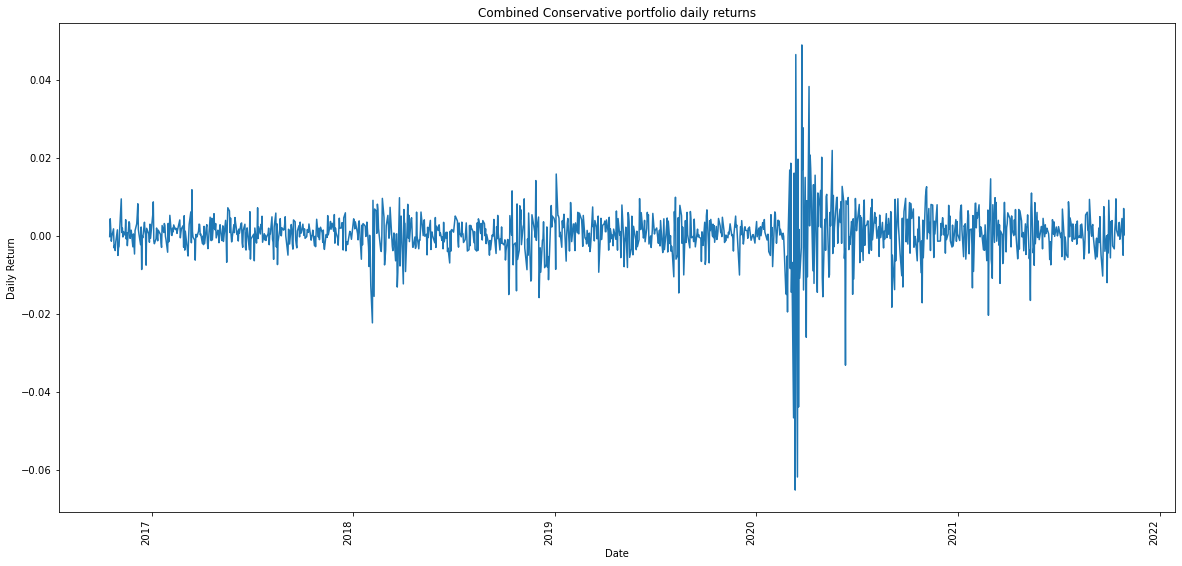

In [88]:
# Plot conservative returns
cons_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Conservative portfolio daily returns")

In [89]:
# Find cumulative returns for conservative portfolio with crypto and plot
conservative_crypto_cumulative_returns = (1 + cons_cummulative_returns_crypto).cumprod() - 1
conservative_crypto_cumulative_returns_plot = conservative_crypto_cumulative_returns.hvplot(title = "Conservative Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
conservative_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [90]:
conservative_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004173
2016-10-19    0.005661
2016-10-20    0.004278
                ...   
2021-10-25    0.704369
2021-10-26    0.702015
2021-10-27    0.693527
2021-10-28    0.705414
2021-10-29    0.705863
Length: 1262, dtype: float64

### Cumalitive returns of moderate portfolio with crypto

In [91]:
# Find percentage change
mod_returns_crypto = mod_combined_MC.pct_change()
mod_returns_crypto.head()

ETH       BTC       BND        VB        VV       VWO  \
               close     close     close     close     close     close   
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-17  0.003356  0.002398  0.002162 -0.001767 -0.002972 -0.001876   
2016-10-18  0.048495 -0.006958  0.001318  0.005817  0.006064  0.017718   
2016-10-19 -0.042265 -0.008377  0.000718  0.004275  0.002452  0.005276   
2016-10-20  0.004163 -0.002763 -0.000598 -0.003172 -0.000917 -0.001312   

                VXUS  
               close  
Date                  
2016-10-14       NaN  
2016-10-17 -0.001950  
2016-10-18  0.011941  
2016-10-19  0.003433  
2016-10-20 -0.000428

In [92]:
# Calculate cummulative return
mod_cummulative_returns_crypto = mod_returns_crypto.dot(mod_weights_crypto)
mod_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000660
2016-10-18    0.006784
2016-10-19    0.001242
2016-10-20   -0.001194
dtype: float64

<AxesSubplot:title={'center':'Combined Moderate portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

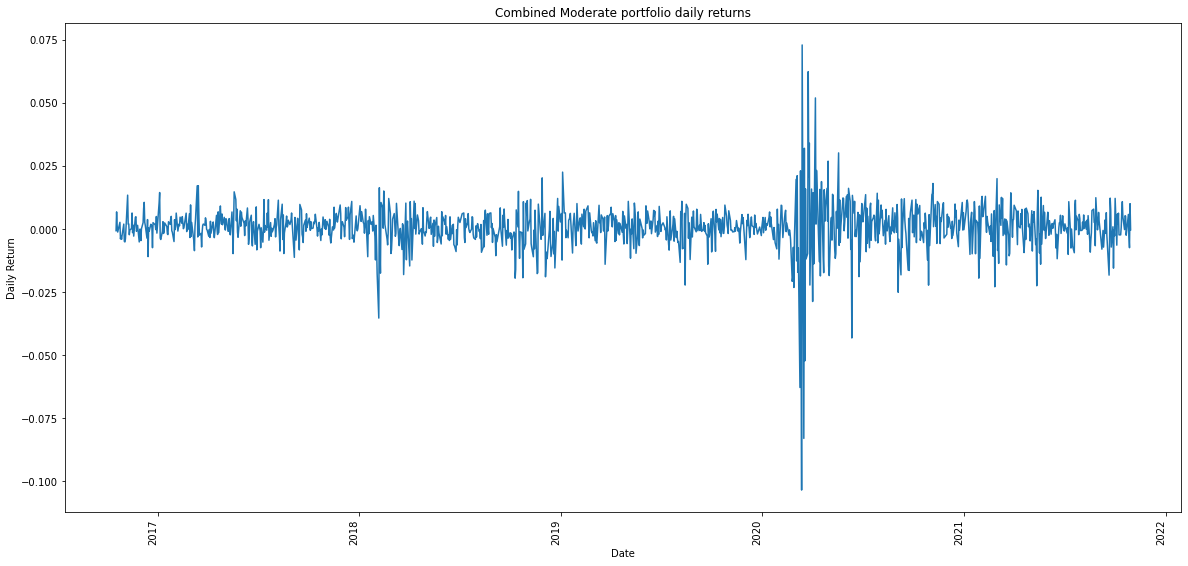

In [93]:
# Plot moderate returns
mod_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Moderate portfolio daily returns")

In [94]:
# Find cumulative returns for moderate portfolio with crypto and plot
moderate_crypto_cumulative_returns = (1 + mod_cummulative_returns_crypto).cumprod() - 1
moderate_crypto_cumulative_returns_plot = moderate_crypto_cumulative_returns.hvplot(title = "Moderate Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
moderate_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [95]:
moderate_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000660
2016-10-18    0.006119
2016-10-19    0.007369
2016-10-20    0.006166
                ...   
2021-10-25    1.213168
2021-10-26    1.207037
2021-10-27    1.190696
2021-10-28    1.212700
2021-10-29    1.212016
Length: 1261, dtype: float64

### Cumalitive returns of aggressive portfolio with crypto

In [96]:
# Find percentage change
agg_returns_crypto = mod_combined_MC.pct_change()
agg_returns_crypto.head()

ETH       BTC       BND        VB        VV       VWO  \
               close     close     close     close     close     close   
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-17  0.003356  0.002398  0.002162 -0.001767 -0.002972 -0.001876   
2016-10-18  0.048495 -0.006958  0.001318  0.005817  0.006064  0.017718   
2016-10-19 -0.042265 -0.008377  0.000718  0.004275  0.002452  0.005276   
2016-10-20  0.004163 -0.002763 -0.000598 -0.003172 -0.000917 -0.001312   

                VXUS  
               close  
Date                  
2016-10-14       NaN  
2016-10-17 -0.001950  
2016-10-18  0.011941  
2016-10-19  0.003433  
2016-10-20 -0.000428

In [97]:
# Calculate cummulative return
agg_cummulative_returns_crypto = agg_returns_crypto.dot(agg_weights_crypto)
agg_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000398
2016-10-18    0.007526
2016-10-19   -0.000193
2016-10-20   -0.001057
dtype: float64

<AxesSubplot:title={'center':'Combined Aggressive portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

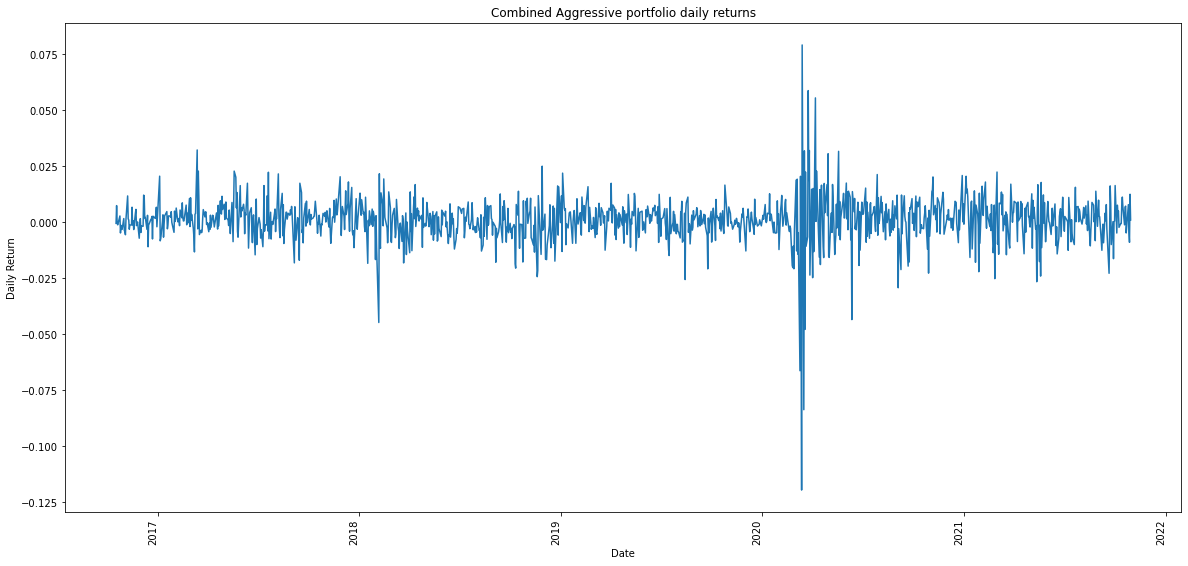

In [98]:
# Plot aggressive returns
agg_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Aggressive portfolio daily returns")

In [99]:
# Find cumulative returns for aggressive portfolio with crypto and plot
aggressive_crypto_cumulative_returns = (1 + agg_cummulative_returns_crypto).cumprod() - 1
aggressive_crypto_cumulative_returns_plot = aggressive_crypto_cumulative_returns.hvplot(title = "Moderate Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
aggressive_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [100]:
aggressive_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000398
2016-10-18    0.007125
2016-10-19    0.006931
2016-10-20    0.005866
                ...   
2021-10-25    2.051274
2021-10-26    2.038663
2021-10-27    2.011698
2021-10-28    2.049624
2021-10-29    2.052983
Length: 1261, dtype: float64

In [101]:
crypto_plots = conservative_crypto_cumulative_returns_plot * moderate_crypto_cumulative_returns_plot * aggressive_crypto_cumulative_returns_plot
crypto_plots

:Overlay
   .Curve.A_0.I   :Curve   [Date]   (0)
   .Curve.A_0.II  :Curve   [Date]   (0)
   .Curve.A_0.III :Curve   [Date]   (0)

In [102]:
# Plot portfolio returns

## Complete and plot monte carlo simulation for all portfolios 

### Monte Carlo for Conservative Portfolio with Crypto

In [103]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_conservative_combined = MCSimulation(
    portfolio_data = cons_combined_MC,
    weights = cons_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [104]:
# Run monte carlo simulation
MC_conservative_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4         5         6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1     0.994161  0.993945  0.999952  1.008494   1.000456  0.996340  1.004991   
2     0.993769  0.998969  0.996249  1.010820   1.002477  1.000813  1.001768   
3     1.000037  0.994766  0.994773  1.015033   1.003241  1.000030  0.995110   
4     0.991223  0.995672  0.990655  1.014521   1.000247  0.999394  1.005730   
...        ...       ...       ...       ...        ...       ...       ...   
5036  8.502253  8.893497  9.532519  9.084490  10.863129  8.797565  9.249196   
5037  8.543714  8.911100  9.472553  9.123192  10.959188  8.785466  9.202207   
5038  8.608637  8.907560  9.459917  9.083674  10.878356  8.761447  9.229797   
5039  8.622656  8.869409  9.489178  9.104844  10.871736  8.732539  9.221776   
5040  8.632689  8.858532  9.511317  9.061730  10.842018  8.749926  9.247341   

           7         8         9    ...        490       491        492  \
0     1.000000  1.000000  1.000000  ...   1.000000  1.000000   1.000000   
1     0.998652  0.999046  0.997889  ...   0.996597  1.000284   1.002695   
2     0.994653  1.002228  0.999924  ...   0.995804  0.996507   1.008189   
3     0.992888  1.009166  1.003596  ...   1.000836  0.991345   1.012642   
4     0.994527  1.007199  1.001731  ...   1.002264  0.987141   1.016399   
...        ...       ...       ...  ...        ...       ...        ...   
5036  7.694211  6.253954  7.224971  ...  16.277312  9.509683  10.648522   
5037  7.719002  6.225317  7.199826  ...  16.339930  9.516233  10.676081   
5038  7.710400  6.219207  7.254228  ...  16.290702  9.479466  10.758884   
5039  7.687259  6.229075  7.251281  ...  16.131461  9.511173  10.809592   
5040  7.642126  6.246165  7.234517  ...  16.147397  9.561960  10.795228   

           493       494        495        496        497       498       499  
0     1.000000  1.000000   1.000000   1.000000   1.000000  1.000000  1.000000  
1     0.996954  0.992872   1.002551   0.995415   0.995361  0.996578  1.007114  
2     0.996904  0.994730   0.999765   0.991285   0.996449  0.996212  1.012775  
3     0.999336  0.993412   0.993817   0.989691   0.999319  0.994949  1.019947  
4     0.995350  0.991440   0.993431   0.984460   1.004727  0.996603  1.022211  
...        ...       ...        ...        ...        ...       ...       ...  
5036  6.742820  7.255399  11.093513  11.603821  12.285146  6.676244  6.193537  
5037  6.753406  7.240723  11.073203  11.640666  12.252548  6.696820  6.206585  
5038  6.769987  7.233540  11.118753  11.664574  12.276605  6.743136  6.207497  
5039  6.785559  7.248923  11.147660  11.613128  12.353046  6.748888  6.178711  
5040  6.792452  7.215038  11.122285  11.589523  12.430902  6.790287  6.181133  

[5041 rows x 500 columns]

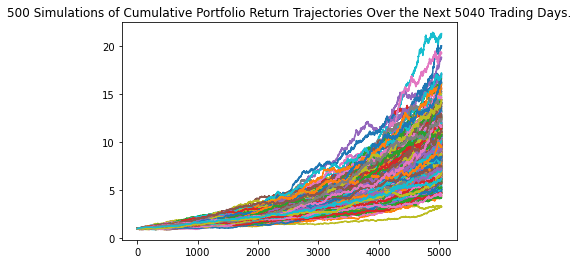

In [105]:
# Line plot for conservative monte carlo sim
line_plot_cons_crypto = MC_conservative_combined.plot_simulation()

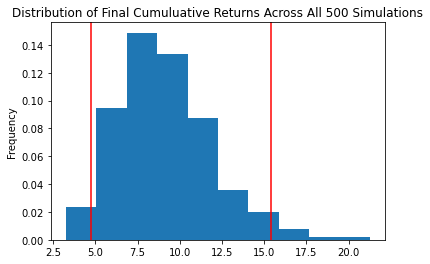

In [106]:
# Distribution plot for conservative monte carlo sim
dist_plot_cons = MC_conservative_combined.plot_distribution()

In [107]:
# Summary statistics
tbl_conservative_combined = MC_conservative_combined.summarize_cumulative_return()
print(tbl_conservative_combined)

count           500.000000
mean              9.150028
std               2.773645
min               3.245740
25%               7.221454
50%               8.788845
75%              10.720663
max              21.270758
95% CI Lower      4.746884
95% CI Upper     15.387127
Name: 5040, dtype: float64


### Monte Carlo for Moderate Portfolio with Crypto

In [108]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_moderate_combined = MCSimulation(
    portfolio_data = mod_combined_MC,
    weights = mod_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [109]:
# Run monte carlo simulation
MC_moderate_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.995914   0.996013   1.003098   0.999114   0.995336   0.998842   
2      0.993409   0.997284   0.996055   0.997822   0.992855   0.997341   
3      0.997747   0.997829   0.994613   0.997905   0.996161   0.994089   
4      0.996475   1.009782   0.994440   0.999515   0.999190   0.990529   
...         ...        ...        ...        ...        ...        ...   
5036  27.273305  38.531560  22.991364  21.099965  15.228868  30.752146   
5037  27.268393  38.368032  23.119150  21.208811  15.264480  30.815831   
5038  27.189267  38.312558  23.163542  21.050262  15.262946  30.812454   
5039  27.217346  38.515425  23.395120  21.177431  15.261062  30.816066   
5040  27.410332  38.739701  23.292487  21.265273  15.266428  30.749647   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.995842   1.007884   0.998181   0.996929  ...   1.001699   1.001028   
2      1.006258   1.014756   1.001401   1.000876  ...   1.001669   0.998896   
3      1.014436   1.009994   1.008251   1.000013  ...   1.001855   1.004970   
4      1.011637   1.005828   1.003175   1.002511  ...   0.992492   1.003140   
...         ...        ...        ...        ...  ...        ...        ...   
5036  32.848219  39.004981  41.310810  29.118957  ...  15.901572  24.508858   
5037  32.681004  39.400095  41.321541  29.224879  ...  15.940285  24.604276   
5038  32.596275  39.271246  41.302850  29.089977  ...  15.997441  24.618018   
5039  32.496263  38.945632  41.215712  29.080050  ...  16.084555  24.653426   
5040  32.879128  38.574295  41.611696  29.268808  ...  15.995426  24.580204   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.002150   1.004789   0.994220   1.007736   0.995519   0.998373   
2      1.003775   1.008408   0.996318   0.996084   0.996116   1.000170   
3      1.000183   1.001507   0.999254   0.989661   0.994907   0.996852   
4      1.001855   1.005627   0.994494   0.999086   0.994594   0.992679   
...         ...        ...        ...        ...        ...        ...   
5036  37.645778  18.154868  37.531144  29.693078  16.506624  33.554594   
5037  37.625027  18.054976  37.427100  29.937398  16.589849  33.470474   
5038  37.235737  17.868738  37.448570  29.855421  16.673485  33.687107   
5039  37.365512  17.808223  37.709678  29.750522  16.543811  33.371952   
5040  37.497236  17.775568  38.083027  29.687509  16.372263  33.268059   

            498        499  
0      1.000000   1.000000  
1      1.005850   1.010781  
2      1.008921   1.006808  
3      1.010711   1.004911  
4      1.008052   1.012260  
...         ...        ...  
5036  27.678603  33.299072  
5037  27.838565  33.016994  
5038  27.883768  33.068061  
5039  28.008662  33.162906  
5040  27.956155  33.187726  

[5041 rows x 500 columns]

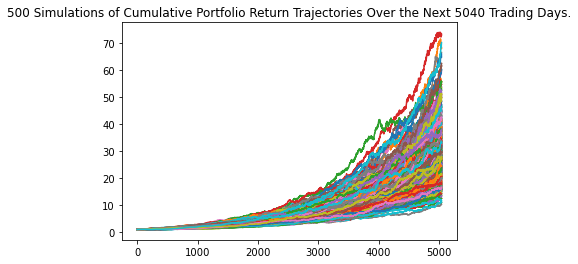

In [110]:
# Line plot for moderate monte carlo sim
line_plot_mod_crypto = MC_moderate_combined.plot_simulation()

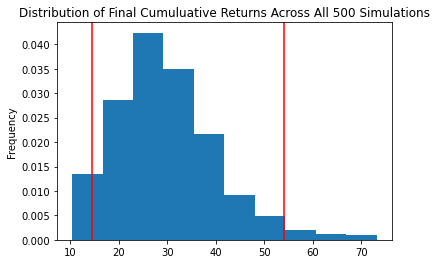

In [111]:
# Distribution plot for conservative monte carlo sim
dist_plot_mod = MC_moderate_combined.plot_distribution()

In [112]:
# Summary statistics
tbl_moderate_combined = MC_moderate_combined.summarize_cumulative_return()
print(tbl_moderate_combined)

count           500.000000
mean             29.814599
std              10.379883
min              10.379460
25%              22.410768
50%              28.581596
75%              35.479507
max              73.140076
95% CI Lower     14.417764
95% CI Upper     54.094552
Name: 5040, dtype: float64


### Monte Carlo for Aggressive Portfolio with Crypto

In [113]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_aggressive_combined = MCSimulation(
    portfolio_data = mod_combined_MC,
    weights = agg_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [114]:
# Run monte carlo simulation
MC_aggressive_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1          2           3           4          5    \
0      1.000000    1.000000   1.000000    1.000000    1.000000   1.000000   
1      0.999916    0.994784   1.002202    0.996088    1.010204   0.991783   
2      1.004409    1.006434   1.009104    0.994422    1.012254   1.000225   
3      1.005255    1.008800   1.007396    0.997061    1.006462   0.996286   
4      1.004014    1.017922   1.010850    1.002874    1.018489   0.997437   
...         ...         ...        ...         ...         ...        ...   
5036  80.596345  178.710014  78.476056  141.370324  226.482262  97.812876   
5037  80.594737  178.171593  78.953778  143.059249  226.036709  98.499855   
5038  80.851291  178.553619  78.695782  143.881910  226.895736  98.269784   
5039  80.595241  178.839947  78.831454  143.304212  227.959879  97.352657   
5040  79.947106  178.291495  78.491113  142.303418  230.946412  97.048913   

            6           7           8          9    ...         490  \
0      1.000000    1.000000    1.000000   1.000000  ...    1.000000   
1      0.993475    1.007893    1.009181   1.000137  ...    0.996091   
2      0.995561    1.004270    1.011323   0.990984  ...    0.992285   
3      1.000982    0.999707    1.002170   0.988508  ...    0.990670   
4      0.996805    0.997325    1.003132   0.983146  ...    0.991991   
...         ...         ...         ...        ...  ...         ...   
5036  52.961917  219.905153  127.221100  78.015431  ...  134.273173   
5037  52.771801  218.875188  127.299143  78.133461  ...  135.084932   
5038  52.492085  219.847345  127.130989  78.295358  ...  134.930926   
5039  52.221749  221.332427  127.626572  77.765688  ...  135.775160   
5040  52.121613  223.215061  127.398967  78.076846  ...  135.460415   

             491        492        493         494        495        496  \
0       1.000000   1.000000   1.000000    1.000000   1.000000   1.000000   
1       1.001520   1.007482   0.991096    1.011389   1.012361   0.998049   
2       1.004664   1.011562   0.982884    1.014630   1.018339   0.996479   
3       1.009162   1.015031   0.986927    1.016265   1.023446   1.007575   
4       1.014550   1.023245   0.993578    1.022267   1.020141   1.013840   
...          ...        ...        ...         ...        ...        ...   
5036  177.367758  82.687242  86.614360  159.188289  83.184880  49.432559   
5037  179.487080  82.439742  86.565861  159.749687  83.433168  49.704742   
5038  179.417857  82.250933  86.891908  160.775423  84.264864  50.374772   
5039  180.550248  82.330568  87.417702  159.160142  84.989256  50.829830   
5040  179.199899  82.703282  86.912671  158.650666  84.448576  51.361081   

            497         498        499  
0      1.000000    1.000000   1.000000  
1      0.996328    0.996112   1.005304  
2      0.995265    1.002732   1.002395  
3      0.998592    1.010803   1.001007  
4      0.982306    1.015532   1.002937  
...         ...         ...        ...  
5036  98.532194  103.374301  84.818095  
5037  98.546538  103.651954  84.680728  
5038  99.164276  103.049793  84.624123  
5039  98.691874  103.075538  84.152932  
5040  98.982581  102.353397  84.823523  

[5041 rows x 500 columns]

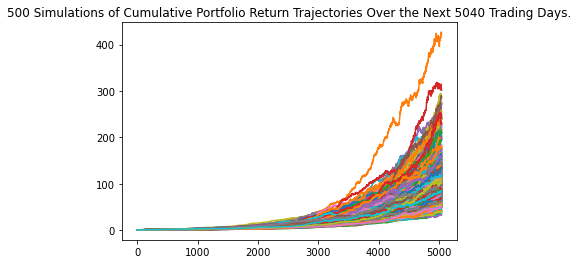

In [115]:
# Line plot for moderate monte carlo sim
line_plot_agg_crypto = MC_aggressive_combined.plot_simulation()

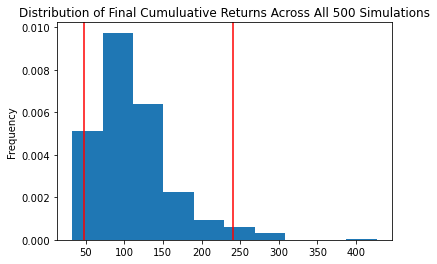

In [116]:
# Distribution plot for conservative monte carlo sim
dist_plot_agg = MC_aggressive_combined.plot_distribution()

In [117]:
# Summary statistics
tbl_aggressive_combined = MC_aggressive_combined.summarize_cumulative_return()
print(tbl_aggressive_combined)

count           500.000000
mean            110.646828
std              49.838488
min              32.546599
25%              77.242889
50%             100.483944
75%             131.301440
max             426.616688
95% CI Lower     48.114931
95% CI Upper    241.398603
Name: 5040, dtype: float64


## Find and plot Beta and Sharpe Ratios for all portfolios

### Beta of conservative portfolio with crypto

In [118]:
# Define risk free rate of return
rf_rate = 0.0158/365

In [119]:
sp500_csv = Path('Conservative_Combined_SPY.csv')
sp500_data = pd.read_csv(sp500_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp500_change= sp500_data.pct_change()
sp500_change.head()

ETH       BTC       BIV       BSV        VB        VV  \
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-15  0.002517  0.000204  0.000000  0.000000  0.000000  0.000000   
2016-10-16  0.000000  0.005892  0.000000  0.000000  0.000000  0.000000   
2016-10-17  0.000837 -0.003676  0.002075  0.001491 -0.001767 -0.002972   
2016-10-18  0.048495 -0.006958  0.001725  0.000248  0.005817  0.006064   

                VXUS       SPY  
Date                            
2016-10-14       NaN       NaN  
2016-10-15  0.000000  0.000000  
2016-10-16  0.000000  0.000000  
2016-10-17 -0.001950 -0.003038  
2016-10-18  0.011941  0.006160

In [120]:
cons_cummulative_returns_crypto

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004372
2016-10-19    0.001482
2016-10-20   -0.001375
                ...   
2021-10-25    0.004449
2021-10-26   -0.001381
2021-10-27   -0.004987
2021-10-28    0.007019
2021-10-29    0.000264
Length: 1262, dtype: float64

In [121]:
# Find conservative covariance
conservative_combined_covariance = cons_cummulative_returns_crypto.cov(sp500_change['SPY'])
conservative_combined_covariance

7.293495610445554e-05

In [122]:
# Calculate the variance of the SP500
variance = sp500_change['SPY'].var()
variance

9.750724307412973e-05

In [123]:
# Calculate beta of conservative portfolio
conservative_beta_crypto = conservative_combined_covariance/variance
conservative_beta_crypto

0.7479952648133724

### Beta of moderate portfolio with crypto

In [124]:
# Find moderate covariance
moderate_combined_covariance = mod_cummulative_returns_crypto.cov(sp500_change['SPY'])
moderate_combined_covariance

9.769884176983442e-05

In [125]:
# Calculate beta of moderate portfolio
moderate_beta_crypto = moderate_combined_covariance/variance
moderate_beta_crypto

1.0019649688542525

### Beta of aggressive portfolio with crypto

In [126]:
# Find aggressive covariance
aggressive_combined_covariance = aggressive_crypto_cumulative_returns.cov(sp500_change['SPY'])
aggressive_combined_covariance

0.0001754358418146587

In [127]:
# Calculate beta of aggressive portfolio
aggressive_beta_crypto = aggressive_combined_covariance/variance
aggressive_beta_crypto

1.7992083078513856

## Sharpe Ratios for all portfolios

In [128]:
# Calculate conservative portfolio sharpe ratio
conservative_crypto_sharpe_ratio = (252*cons_cummulative_returns_crypto.mean() - rf_rate)/ (cons_cummulative_returns_crypto.std() * np.sqrt(252))
conservative_crypto_sharpe_ratio

1.0905234359333524

In [129]:
# Calculate moderate portfolio sharpe ratio
moderate_crypto_sharpe_ratio = (252*mod_cummulative_returns_crypto.mean() - rf_rate)/ (mod_cummulative_returns_crypto.std() * np.sqrt(252))
moderate_crypto_sharpe_ratio

1.1879979300704762

In [130]:
# Calculate aggressive portfolio sharpe ratio
aggressive_crypto_sharpe_ratio = (252*agg_cummulative_returns_crypto.mean() - rf_rate)/ (agg_cummulative_returns_crypto.std() * np.sqrt(252))
aggressive_crypto_sharpe_ratio

1.4709595185764175

## Compare risk and return of traditional portfolios vs. portfolios with digital assets

In [131]:
mean_aggressive = MC_aggressive_combined.summarize_cumulative_return()['mean']
min_aggressive = MC_aggressive_combined.summarize_cumulative_return()['min']
mean_moderate = MC_moderate_combined.summarize_cumulative_return()['mean']
mean_conservative = MC_conservative_combined.summarize_cumulative_return()['mean']

In [132]:
print("Now we see the aggressive portfolio has about 4x greater return compare to the moderate risk portfolio.")
print("")
print("Aggressive Mean: ", mean_aggressive)
print("Moderate Mean: ", mean_moderate)
print("Conservative Mean: ", mean_conservative)

Now we see the aggressive portfolio has about 4x greater return compare to the moderate risk portfolio.

Aggressive Mean:  110.64682849666876
Moderate Mean:  29.814599341089302
Conservative Mean:  9.150028293846912


In [133]:
# Compare result cumulative returns 
Combined_cumulative_returns = aggressive_crypto_cumulative_returns + moderate_crypto_cumulative_returns + conservative_crypto_cumulative_returns
Combined_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.001257
2016-10-18    0.017417
2016-10-19    0.019960
2016-10-20    0.016310
                ...   
2021-10-25    3.968811
2021-10-26    3.947716
2021-10-27    3.895921
2021-10-28    3.967738
2021-10-29    3.970862
Length: 1262, dtype: float64

In [134]:
# Plot and compare beta

print("Each portfolios Beta")
print("--------------------")
print("Aggressive Beta: ", aggressive_beta_crypto)
print("Moderate Beta: ", moderate_beta_crypto)
print("Conservative Beta: ", conservative_beta_crypto)

Each portfolios Beta
--------------------
Aggressive Beta:  1.7992083078513856
Moderate Beta:  1.0019649688542525
Conservative Beta:  0.7479952648133724


In [135]:
# Compare Sharpe ratios 
combined_sharpes = conservative_crypto_sharpe_ratio + moderate_crypto_sharpe_ratio + aggressive_crypto_sharpe_ratio
combined_sharpes

3.749480884580246